## Cleaning cohort data: Cleaning UK Biobank synthetic data with Python

This is more of a practical and a technical session compared to other sessions in this workshop.
Hopefully, you will be able to follow it. Please feel free to ask any questions or interrupt me
if you need more details.
I will be using python, jupyter notebook and Google colab environment.
Just a bit of intro into these tools in case you have not heard them before.
Jupyter notebook is a ...
Google Colab is a hosted Jupyter notebook with some other features. ...

For this analysis I am going to use UK Biobank synthetic dataset created as part of CINECA
project. This data is also stored in EBI [BioSamples](https://wwwdev.ebi.ac.uk/biosamples/samples?filter=attr%3Aproject%3AUKB_SYNTHETIC_DATA)
and [EGA](https://ega-archive.org/datasets/EGAD00001006308) archives.
UK Biobank dataset in general and also synthetic datasets we have in CINECA are quite clean. But for
this analysis I needed bit dirty or realistic dataset. Therefore, I applied some noise into this
dataset to help with our task. Such as introducing spelling errors, value encoding and so on.
Therefore, the dataset we have on hand is not a realistic representation of CINECA synthetic data or
UK Biobank data.

The first part of any data cleaning or analysing task is understanding data.
Therefore, after loading data, lets have a look at the shape of the data we have.

In [11]:
import pandas as pd

ukb_data = pd.read_csv("data/ukb_synthetic_data_with_noise.csv")
print("Shape of data: " + str(ukb_data.shape))
ukb_data.head()

Shape of data: (2521, 81)


,eid,Sample name,Accession,Subject id,EGA sample id,Platelet count-0.0,Ethnic background-0.0,Body mass index (BMI)-0.0,Weight-0.0,Diabetes diagnosed by doctor-0.0,...,Operative procedures - OPCS4-0.0,Frequency of drinking alcohol-0.0,"Blood, blood-forming organs and certain immune disorders","Endocrine, nutritional and metabolic diseases",Mental and behavioural disorders,Nervous system disorders,Digestive system disorders,Respiratory system disorders,Circulatory system disorders,Covid-19 tests results
0,fake1,UKB_FAKE_1,SAMEA7082814,HG00096,EGAN00002587077,244.9589,African,26.638383,85.6358,Yes,...,L46.3 Ligation of visceral branch of abdominal...,Monthly or less,NaN,NaN,NaN,alzheimer's disease,NaN,NaN,NaN,Negative
1,fake2,UKB_FAKE_2,SAMEA7083131,HG00097,EGAN00002588943,215.7736,British,25.622784,64.5722,Yes,...,K06.1 Repositioning of transposed great arteries,4 or more times a week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
2,fake3,UKB_FAKE_3,SAMEA7082831,HG00099,EGAN00002589008,312.3504,Asian or Asian British,22.359763,64.4364,Prefer not to answer,...,T89.4 Cannulation of lymphatic duct,2 to 3 times a week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
3,fake4,UKB_FAKE_4,SAMEA7084191,HG00100,EGAN00002587535,150.0247,White and Asian,28.278855,74.4885,Prefer not to answer,...,T77.2 Wide excision of muscle,2 to 3 times a week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
4,fake5,UKB_FAKE_5,SAMEA7082531,HG00101,EGAN00002589004,215.5871,White and Black African,25.520670,82.3472,Yes,...,Z01.4 Tissue of occipital lobe of brain,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative


Our dataset has 81 columns and 2521 rows. Each column represent a field in our
dataset and rows are number of data points. If we look closely,
we have categorical values, numerical values and also IDs. I am going to ignore IDs in this
inspection, and I am also not going to focus much on numbers. I will be focusing on cleaning
text values. But before that lets just see the distribution of some variables. Just for fun of it!

(array([0.0002396 , 0.0002396 , 0.00047919, 0.00071879, 0.00047919,
        0.00143758, 0.00047919, 0.00263556, 0.00359394, 0.00191677,
        0.0059899 , 0.00479192, 0.00646909, 0.00479192, 0.00934424,
        0.00886505, 0.01030263, 0.01174021, 0.01533415, 0.01509455,
        0.01701132, 0.02108445, 0.01964687, 0.02563677, 0.02348041,
        0.02827233, 0.02443879, 0.02659516, 0.02563677, 0.03090789,
        0.02156364, 0.02563677, 0.02683475, 0.02443879, 0.01844889,
        0.02443879, 0.01701132, 0.01509455, 0.01365697, 0.01078182,
        0.0119798 , 0.00694828, 0.00838586, 0.00527111, 0.0057503 ,
        0.00646909, 0.00311475, 0.00311475, 0.00215636, 0.00215636,
        0.0002396 , 0.00095838, 0.0002396 , 0.00047919, 0.00095838,
        0.        , 0.        , 0.        , 0.        , 0.0002396 ]),
 array([ 28.2759 ,  29.93147,  31.58704,  33.24261,  34.89818,  36.55375,
         38.20932,  39.86489,  41.52046,  43.17603,  44.8316 ,  46.48717,
         48.14274,  49.79831,  51.

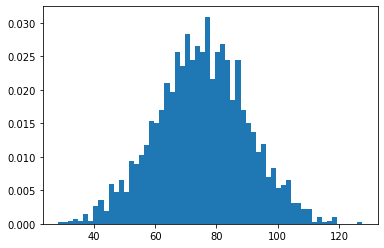

In [12]:
import matplotlib.pyplot as plt

ukb_data['Weight-0.0'].describe()
plt.hist(ukb_data['Weight-0.0'], density=True, bins=60)

In [13]:
print(ukb_data['Frequency of drinking alcohol-0.0'].unique())
print(ukb_data['Current tobacco smoking-0.0'].unique())
print(ukb_data['Sex'].unique())
print(ukb_data['Nervous system disorders'].unique())

['Monthly or less' '4 or more times a week' '2 to 3 times a week' 'Never'
 'Prefer not to answer' '2 to 4 times a month']
['Prefer not to answer' 'No' 'Yes, on most or all days'
 'Only occasionally']
[1 0]
["alzheimer's disease" nan 'multiple sclerosis' "huntington's disease"
 'multiple uclerusis' "alzhjimer'u disease" "alzheimer'a diiease"
 "hunjington's dislase" "huntington's dismaae" "alzzeimer'q disease"
 'cultiple gclerosis' "alzhecmer's disease" "alzheimer'w dinease"
 "alzheimer's diselje" "jlzleimer's disease" "quntington's disejse"
 "abzheimnr's disease" "alzheimer'lkdsseasx" "huntinwdon's disease"
 'multialezsclerosis' 'aultrple sclerosis' "hyntingtox's disease"
 'multnsle sclerosis' 'multiple mcxerosis' "alzheimeb's diseqse"
 "alzheixer's diseasa" "huntinwton's lisease" "tlzheimer's disease"
 'multuple sclirosis']


In [14]:
pd.DataFrame(ukb_data['Frequency of drinking alcohol-0.0'].unique(), columns=['unique_values'])

,unique_values
0,Monthly or less
1,4 or more times a week
2,2 to 3 times a week
3,Never
4,Prefer not to answer
5,2 to 4 times a month


Before moving forward with further exploration, I am going to do our first two data cleaning tasks.
1. Normalise column headers (fields)
2. Remove unwanted columns.

UKB has longitudinal data associated with different measurements taken at
different times. Therefore, it has this index at the end of some fields. Let's just get rid of it
using python regex package. We will simply replace `-0.0` with an empty string.
That is better!

We have several ID values in this dataset. I will remove most of them and only retain
`sample name`. This is enough to uniquely identify each row. At a later stage, if we need any
other ID, we can easily merge them back.

In [15]:
import re

ukb_data.rename(columns=lambda x: re.sub('-0.0', '', x), inplace=True)
ukb_data.rename(columns=lambda x: x.strip(), inplace=True)
ukb_data.rename(columns=lambda x: x.lower(), inplace=True)

ukb_data.drop(['eid', 'accession', 'subject id', 'ega sample id'], axis=1, inplace=True)
pd.DataFrame(ukb_data.columns, columns=['fields'])

,fields
0,sample name
1,platelet count
2,ethnic background
3,body mass index (bmi)
4,weight
...,...
72,nervous system disorders
73,digestive system disorders
74,respiratory system disorders
75,circulatory system disorders


Lets explore distribution of some variables.

`sex` is an important variable. Looking at its values, we can see it is encoded in our dataset.
Luckily, we have text representation of its encoded values.
```
0 - Female
1 - male
```
Let's replace these encoded values with its text values. This will be useful in analysis
steps further down the pipeline, specially if you plan to do any cross cohort analysis.

In [16]:
ukb_data['sex'] = ukb_data['sex'].map({0: 'female', 1: 'male'})
pd.DataFrame(ukb_data['sex'].unique(), columns=['values'])


,values
0,male
1,female


`Ethnic background` looks like an interesting enough variable. Let's see how many unique values we have
under this column.
We have 147 unique values. That is a bit more than I expected. The problem here is, if we look closer,
there are a lot of spelling mistakes. How can we fix this. If we know list of values we are expecting
for this field we can easily correct them. But most of the time we do not know the whole set of values.
In that case we can use a dictionary to fix as much as possible. Generic dictionary is available in
`python nltk` library. If our use case require more scientific vocabulary, one option is to construct
a vocabulary and pass it to the spelling corrector. Let's go over these methods quickly.

Case no 1: I know the full list of values of the field and will use this list to correct values.

Second case, I only have a generic dictionary and try to correct field values using this.

Finally, I am going to augment the existing dictionary with a set of more domain specific vocabulary.
This will increase the accuracy compared to the second approach.


In [17]:
import numpy as np
from difflib import SequenceMatcher

ethnic_b_values_noise = ukb_data['ethnic background'].unique()

ethnic_b_values = ['African', 'British', 'Asian or Asian British', 'White and Asian',
                   'White and Black African', 'Prefer not to answer',
                   'Any other Asian background', 'White and Black Caribbean',
                   'Black or Black British', 'Any other mixed background',
                   'Bangladeshi', 'Do not know', 'Any other Black background',
                   'Irish', 'Mixed', 'White', 'Pakistani', 'Caribbean',
                   'Other ethnic group', 'Indian', 'Any other white background',
                   'Chinese']

similarity_list = []
for val in ethnic_b_values_noise:
    similarity = [SequenceMatcher(None, val, x).ratio() for x in ethnic_b_values]
    best_match = ethnic_b_values[np.argmax(similarity)]
    ratio = max(similarity)
    similarity_list.append({'value': val, 'best_match': best_match, 'ratio': ratio})

mappings = pd.DataFrame(similarity_list)
mappings[mappings['ratio'] < 1]

,value,best_match,ratio
12,Asian kr Asiao British,Asian or Asian British,0.909091
18,Caribjcan,Caribbean,0.777778
19,White and Black Caribbeau,White and Black Caribbean,0.960000
22,Brktisr,British,0.714286
24,Chvnese,Chinese,0.857143
...,...,...,...
142,White and Blach Caribbean,White and Black Caribbean,0.960000
143,Mqked,Mixed,0.600000
144,Asian or Asiin British,Asian or Asian British,0.954545
145,otiak or Asiqn British,Asian or Asian British,0.818182


In [18]:
ethnic_b_mappings = {match['value']: match['best_match'] for match in similarity_list}
ukb_data['ethnic background'] = ukb_data['ethnic background'].map(ethnic_b_mappings)
pd.DataFrame(ukb_data['ethnic background'].unique(), columns=['values'])

,values
0,African
1,British
2,Asian or Asian British
3,White and Asian
4,White and Black African
5,Prefer not to answer
6,Any other Asian background
7,White and Black Caribbean
8,Black or Black British
9,Any other mixed background


I am going to select field `blood, blood-forming organs and certain immune disorders`
for our spell correction using dictionary. Before that lets have a look at values.
We have 29 unique values, ignoring `nan` which was there for empty cells.
First, we will have a quick look at our dictionary: the value `agranulocytosis` is present
in our generic dictionary, so any close spelling errors for the value can be corrected.
Let's go ahead can fix spelling errors using generic dictionary terms.

In [19]:
pd.DataFrame(ukb_data['blood, blood-forming organs and certain immune disorders'].dropna().unique(),
             columns=['unique_values'])

,unique_values
0,iron deficiency anaemia
1,agranulocytosis
2,ugraaulocytosis
3,sarcoidosis
4,amranulocytosts
5,iron defisiency anaemia
6,uarcoidosis
7,agravulocytosis
8,iron deficijncy anaemia
9,sarcjidlsis


In [20]:
import pkg_resources
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
bigram_path = pkg_resources.resource_filename("symspellpy", "frequency_bigramdictionary_en_243_342.txt")

sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

disorder_values = ukb_data['blood, blood-forming organs and certain immune disorders'].dropna().unique()
suggestion_list = []
for val in disorder_values:
    # suggestions = sym_spell.lookup(val, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
    suggestions = sym_spell.lookup_compound(val, max_edit_distance=2)
    suggestion_list.append({'value': val, 'suggestion': suggestions[0].term})

pd.DataFrame(suggestion_list)

,value,suggestion
0,iron deficiency anaemia,iron deficiency anaemia
1,agranulocytosis,agranulocytosis
2,ugraaulocytosis,agranulocytosis
3,sarcoidosis,sarcoid sis
4,amranulocytosts,agranulocytosis
5,iron defisiency anaemia,iron deficiency anaemia
6,uarcoidosis,sarcoid sis
7,agravulocytosis,agranulocytosis
8,iron deficijncy anaemia,iron deficiency anaemia
9,sarcjidlsis,sarcoid sis


Spell correction was able to fix both `iron deficiency anaemia` and `agranulocytosis`, since these words
are available in the dictionary. But it completely failed the term `sarcoidosis`, and even gave bad
suggestions for it. It is possible some of these terms are very domain specific and not present in day to
day text. Therefore, we will import disease specific set of terms from the one of the popular ontologies.
I am going to augment our dictionary with terms/phrases from MONDO ontology. I have created the file
`frequency_dictionary_with_mondo.txt` which contains terms from both generic dictionary and MONDO.
Let's try spelling correction one more time.

In [21]:
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=4, prefix_length=7)
dictionary_path = 'data/frequency_dictionary_with_mondo.txt'
bigram_path = 'data/frequency_bigramdictionary_with_mondo.txt'

sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
sym_spell.load_bigram_dictionary(bigram_path, term_index=0, count_index=2)

disorder_values = ukb_data['blood, blood-forming organs and certain immune disorders'].dropna().unique()
suggestion_list = []
for val in disorder_values:
    suggestions = sym_spell.lookup_compound(val, max_edit_distance=2)
    suggestion_list.append({'value': val, 'suggestion': suggestions[0].term})

pd.DataFrame(suggestion_list)


,value,suggestion
0,iron deficiency anaemia,iron deficiency anaemia
1,agranulocytosis,agranulocytosis
2,ugraaulocytosis,agranulocytosis
3,sarcoidosis,sarcoidosis
4,amranulocytosts,agranulocytosis
5,iron defisiency anaemia,iron deficiency anaemia
6,uarcoidosis,sarcoidosis
7,agravulocytosis,agranulocytosis
8,iron deficijncy anaemia,iron deficiency anaemia
9,sarcjidlsis,sarcoidosis


In [23]:
disorder_mappings = {match['value']: match['suggestion'] for match in suggestion_list}
ukb_data['blood, blood-forming organs and certain immune disorders'] = \
    ukb_data['blood, blood-forming organs and certain immune disorders'].map(disorder_mappings)
pd.DataFrame(ukb_data['blood, blood-forming organs and certain immune disorders'].dropna().unique())

,0
0,iron deficiency anaemia
1,agranulocytosis
2,sarcoidosis
3,pron deficiency anaemia


Now if we check unique number of values for this column, we have 4. Having a closer look, apart from the
`pron deficiency anaemia` other values looks ok. The problem with `pron` is, it is present in the dictionary
and hence spell correction did not work as we expected. There are few things we can try by tweaking the
dictionary word probability and probability of two words happening together. But we will not try this
today.

Our last action for today is to try and annotate these values with ontology terms. We will use
[EBI ZOOMA](https://www.ebi.ac.uk/spot/zooma) to find proper annotations for the values in this field.


Our next action is trying to ontologise these terms.

In [27]:
import requests

mappings = []
disorder_values = ukb_data['blood, blood-forming organs and certain immune disorders'].dropna().unique()
headers = {'Accept': 'application/json'}
for val in disorder_values:
    params = {'propertyValue': val}
    r = requests.get('https://www.ebi.ac.uk/spot/zooma/v2/api/services/annotate', params=params, headers=headers)
    if r.raise_for_status():
        print("Failed to get ontology")
    response = r.json()
    mappings.append({'value': val,
                     'ontology': response[0]['semanticTags'],
                     'confidence': response[0]['confidence']})

pd.DataFrame(mappings, columns=['value', 'ontology', 'confidence'])

,value,ontology,confidence
0,iron deficiency anaemia,[http://purl.obolibrary.org/obo/HP_0001891],HIGH
1,agranulocytosis,[http://purl.obolibrary.org/obo/HP_0012234],HIGH
2,sarcoidosis,[http://purl.obolibrary.org/obo/MONDO_0019338],HIGH
3,pron deficiency anaemia,[http://purl.obolibrary.org/obo/HP_0001891],GOOD


`ZOOMA` was able to assign ontologies to all the values we had. It even assigned our misspelled
`pron deficiency anaemia` with ontology term [`HP_0001891`](https://www.ebi.ac.uk/ols/ontologies/hp/terms?iri=http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FHP_0001891)
with a `GOOD` mapping confidence.

Having ontologies supercharge our data, and they become highly interoperable. Cleaned and well
annotated data at the source will help scientist to spend their much valueble time on actual analysis
and research than tackling with data.


In [29]:
value = 'iron deficiency anaemia'
params = {'propertyValue': 'iron deficiency anaemia'}
headers = {'Accept': 'application/json'}
r = requests.get('https://www.ebi.ac.uk/spot/zooma/v2/api/services/annotat', params=params, headers=headers)
r.raise_for_status()
response = r.json()
mappings = {'value': value,
            'ontology': response[0]['semanticTags'],
            'confidence': response[0]['confidence']}
print(mappings)
response

HTTPError: 404 Client Error: Not Found for url: https://www.ebi.ac.uk/spot/zooma/v2/api/services/annotat?propertyValue=iron+deficiency+anaemia